## Discrete Fourier transforms

https://docs.scipy.org/doc/scipy/reference/fftpack.html#module-scipy.fftpack

In [12]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
%matplotlib inline

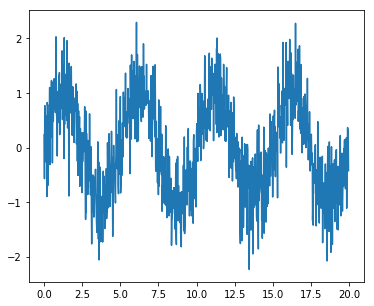

In [8]:
#Generate the signal 

# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)

sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.show()

Text(0,0.5,'plower')

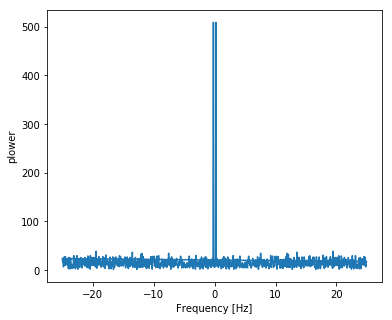

In [10]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

0.2 0.2


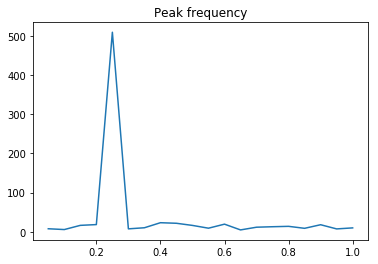

In [23]:
# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)

freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

print peak_freq, 1./period

# An inner plot to show the peak frequency
#axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:20], power[:20])
#plt.setp(axes, yticks=[])

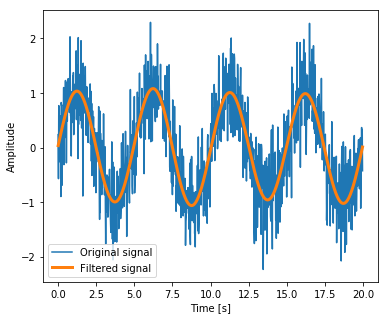

In [25]:
#Remove all the high frequencies

high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')

plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend(loc='best')

## Solutions of the exercises for scipy

In [28]:
data = np.loadtxt('population.txt') 
years = data[:, 0]
populations = data[:, 1:]

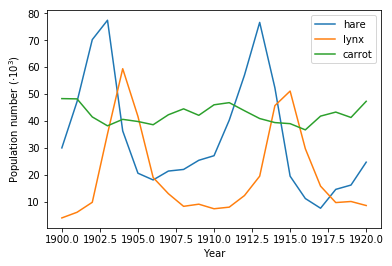

In [29]:
plt.figure()
plt.plot(years, populations * 1e-3) 
plt.xlabel('Year')
plt.ylabel('Population number ($\cdot10^3$)') 
plt.legend(['hare', 'lynx', 'carrot'], loc=1)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()


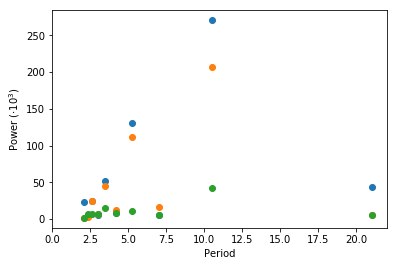

In [30]:
ft_populations = fftpack.fft(populations, axis=0)
frequencies = fftpack.fftfreq(populations.shape[0], years[1] - years[0])
periods = 1 / frequencies

plt.figure()
plt.plot(periods, abs(ft_populations) * 1e-3, 'o')
plt.xlim(0, 22)
plt.xlabel('Period')
plt.ylabel('Power ($\cdot10^3$)')
plt.show()

## Signal processing

https://docs.scipy.org/doc/scipy/reference/signal.html#module-scipy.signal

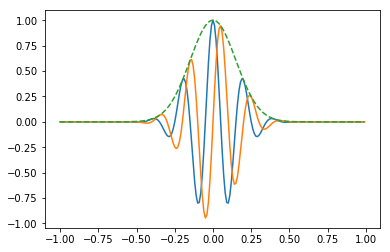

In [51]:
#Plot real component, imaginary component, and envelope for a 5 Hz pulse, 
#sampled at 100 Hz for 2 seconds:

t = np.linspace(-1, 1, 2 * 100, endpoint=False)
i, q, e = signal.gausspulse(t, fc=5, retquad=True, retenv=True)
plt.plot(t, i, t, q, t, e, '--')

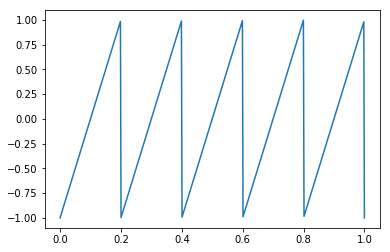

In [52]:
t = np.linspace(0, 1, 500)
plt.plot(t, signal.sawtooth(2 * np.pi * 5 * t))

(-2, 2)

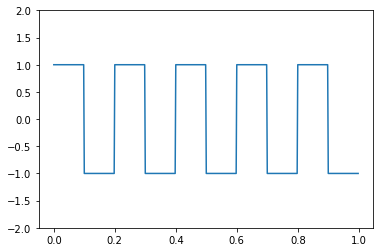

In [53]:
#A 5 Hz waveform sampled at 500 Hz for 1 second:
t = np.linspace(0, 1, 500, endpoint=False)
plt.plot(t, signal.square(2 * np.pi * 5 * t))
plt.ylim(-2, 2)

(-1.5, 1.5)

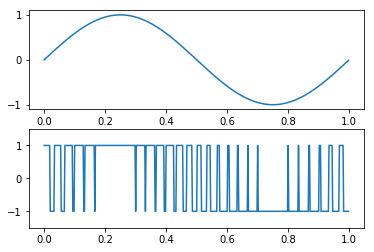

In [54]:
#A pulse-width modulated sine wave:
plt.figure()
sig = np.sin(2 * np.pi * t)
pwm = signal.square(2 * np.pi * 30 * t, duty=(sig + 1)/2)
plt.subplot(2, 1, 1)
plt.plot(t, sig)
plt.subplot(2, 1, 2)
plt.plot(t, pwm)
plt.ylim(-1.5, 1.5)

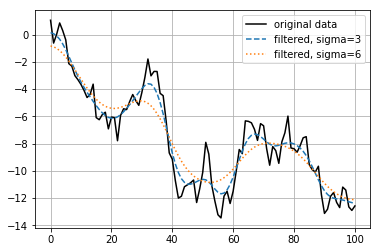

In [33]:
from scipy.ndimage import gaussian_filter1d

np.random.seed(280490)
x = np.random.randn(101).cumsum()
y3 = gaussian_filter1d(x, 3)
y6 = gaussian_filter1d(x, 6)

plt.plot(x, 'k', label='original data')
plt.plot(y3, '--', label='filtered, sigma=3')
plt.plot(y6, ':', label='filtered, sigma=6')
plt.legend()
plt.grid()
plt.show()

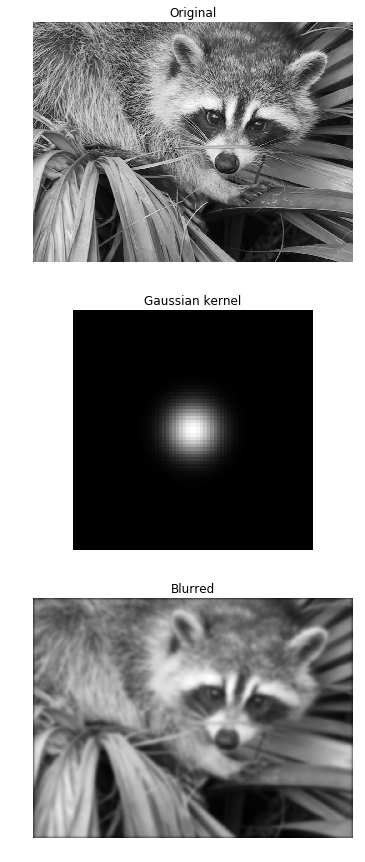

In [55]:
from scipy import misc
from scipy import signal

sig = np.random.randn(10000)
autocorr = signal.fftconvolve(sig, sig[::-1], mode='full')

face = misc.face(gray=True)
kernel = np.outer(signal.gaussian(70, 5), signal.gaussian(70, 5))
blurred = signal.fftconvolve(face, kernel, mode='same')


fig, (ax_orig, ax_kernel, ax_blurred) = plt.subplots(3, 1, figsize=(6, 15))

ax_orig.imshow(face, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()

ax_kernel.imshow(kernel, cmap='gray')
ax_kernel.set_title('Gaussian kernel')
ax_kernel.set_axis_off()

ax_blurred.imshow(blurred, cmap='gray')
ax_blurred.set_title('Blurred')
ax_blurred.set_axis_off()
fig.show()

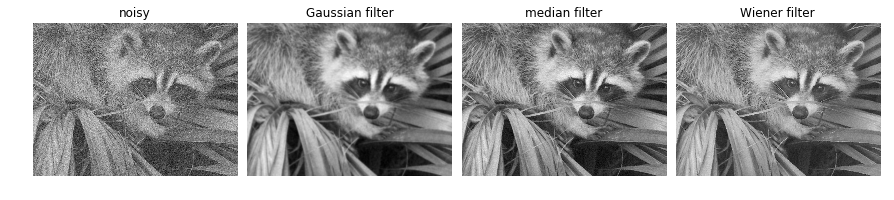

In [31]:
from scipy import signal
from matplotlib import pyplot as plt

noisy_face = np.copy(face).astype(np.float)
noisy_face += face.std() * 0.5 * np.random.standard_normal(face.shape) 
blurred_face = ndimage.gaussian_filter(noisy_face, sigma=3) 
median_face = ndimage.median_filter(noisy_face, size=5)
wiener_face = signal.wiener(noisy_face, (5, 5))

plt.figure(figsize=(12, 3.5))
plt.subplot(141)
plt.imshow(noisy_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('noisy')

plt.subplot(142)
plt.imshow(blurred_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Gaussian filter')

plt.subplot(143)
plt.imshow(median_face, cmap=plt.cm.gray)
plt.axis('off')
plt.title('median filter')

plt.subplot(144)
plt.imshow(wiener_face, cmap=plt.cm.gray)
plt.title('Wiener filter')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)

plt.show()

## Multi-dimensional image processing

https://docs.scipy.org/doc/scipy/reference/ndimage.html#module-scipy.ndimage

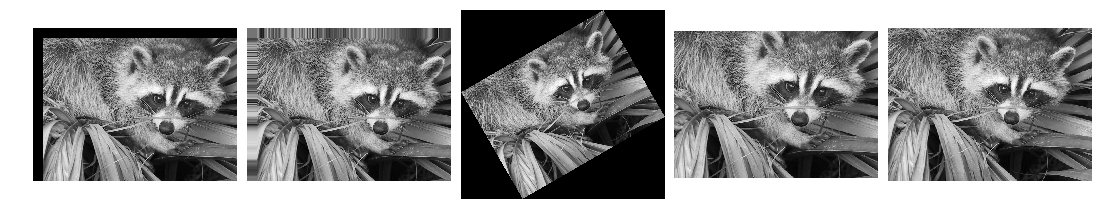

In [8]:
# Load some data
from scipy import misc
face = misc.face(gray=True)

# Apply a variety of transformations
from scipy import ndimage
from matplotlib import pyplot as plt
shifted_face = ndimage.shift(face, (50, 50))
shifted_face2 = ndimage.shift(face, (50, 50), mode='nearest') 
rotated_face = ndimage.rotate(face, 30)
cropped_face = face[50:-50, 50:-50]
zoomed_face = ndimage.zoom(face, 0.5)
zoomed_face.shape


plt.figure(figsize=(15, 3))
plt.subplot(151)
plt.imshow(shifted_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(152)
plt.imshow(shifted_face2, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(153)
plt.imshow(rotated_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(154)
plt.imshow(cropped_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(155)
plt.imshow(zoomed_face, cmap=plt.cm.gray)
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.99)
plt.show()

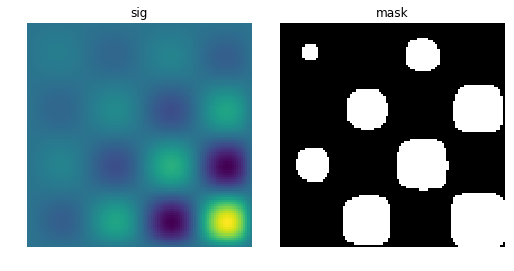

In [18]:
import numpy as np
np.random.seed(0)
x, y = np.indices((100, 100))
sig = np.sin(2*np.pi*x/50.) * np.sin(2*np.pi*y/50.) * (1+x*y/50.**2)**2
mask = sig > 1

plt.figure(figsize=(7, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(sig)
plt.axis('off')
plt.title('sig')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')
plt.title('mask')
plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)


(-0.5, 99.5, 99.5, -0.5)

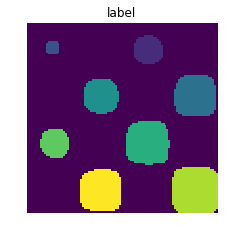

In [21]:
#Label connected components

labels, nb = ndimage.label(mask)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(labels)
plt.title('label')
plt.axis('off')

#plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

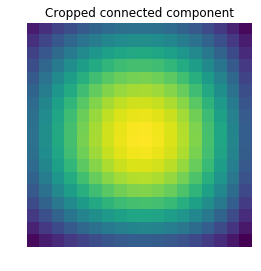

In [28]:
#Extract the 4th connected component, and crop the array around it

sl = ndimage.find_objects(labels==4)
plt.figure(figsize=(3.5, 3.5))
plt.imshow(sig[sl[0]])
plt.title('Cropped connected component')
plt.axis('off')

plt.subplots_adjust(wspace=.05, left=.01, bottom=.01, right=.99, top=.9)

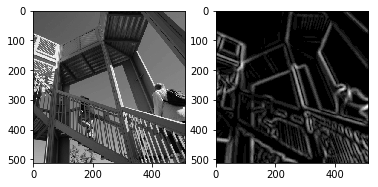

In [34]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.gaussian_gradient_magnitude(ascent, sigma=5)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

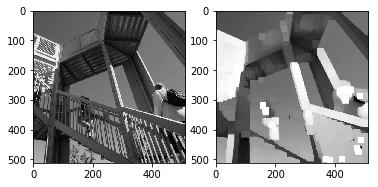

In [35]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.maximum_filter(ascent, size=20)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()

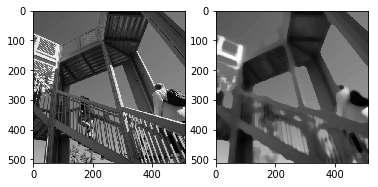

In [36]:
fig = plt.figure()
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side
ascent = misc.ascent()
result = ndimage.median_filter(ascent, size=20)
ax1.imshow(ascent)
ax2.imshow(result)
plt.show()